In [1]:
import numpy as np
from numpy import linalg as la
import math
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Create simulated data

In [2]:
# simulate linear parameter evolution
duration = 800
step = .02
numsteps = int(duration * 1/step)

a = np.linspace(np.log(10),np.log(30),numsteps)
m = np.linspace(250,150,numsteps)
s = np.linspace(12,20,numsteps)

In [3]:
# simulate position + firing rate

pos = np.zeros(800*50)
lamb = np.zeros(800*50)
direction = 1

for i in range(1, pos.shape[0]):
    pos[i] = pos[i-1] + 2.5*direction
    if pos[i] >= 300:
        direction = -1
        pos[i] = 300 - (pos[i]-300)
    if pos[i] <= 0:
        direction = 1
        pos[i] = 0 + (0-pos[i])
    
    lamb[i] = math.exp(a[i] - ((pos[i]-m[i])**2)/(2*(s[i]**2)))  # cosine tuning

In [4]:
# simulate spiking
rng = np.random.default_rng()
spike = np.zeros((numsteps),dtype='int64')
for t in range(0,numsteps):
    spike[t] = rng.binomial(1, lamb[t]*step)

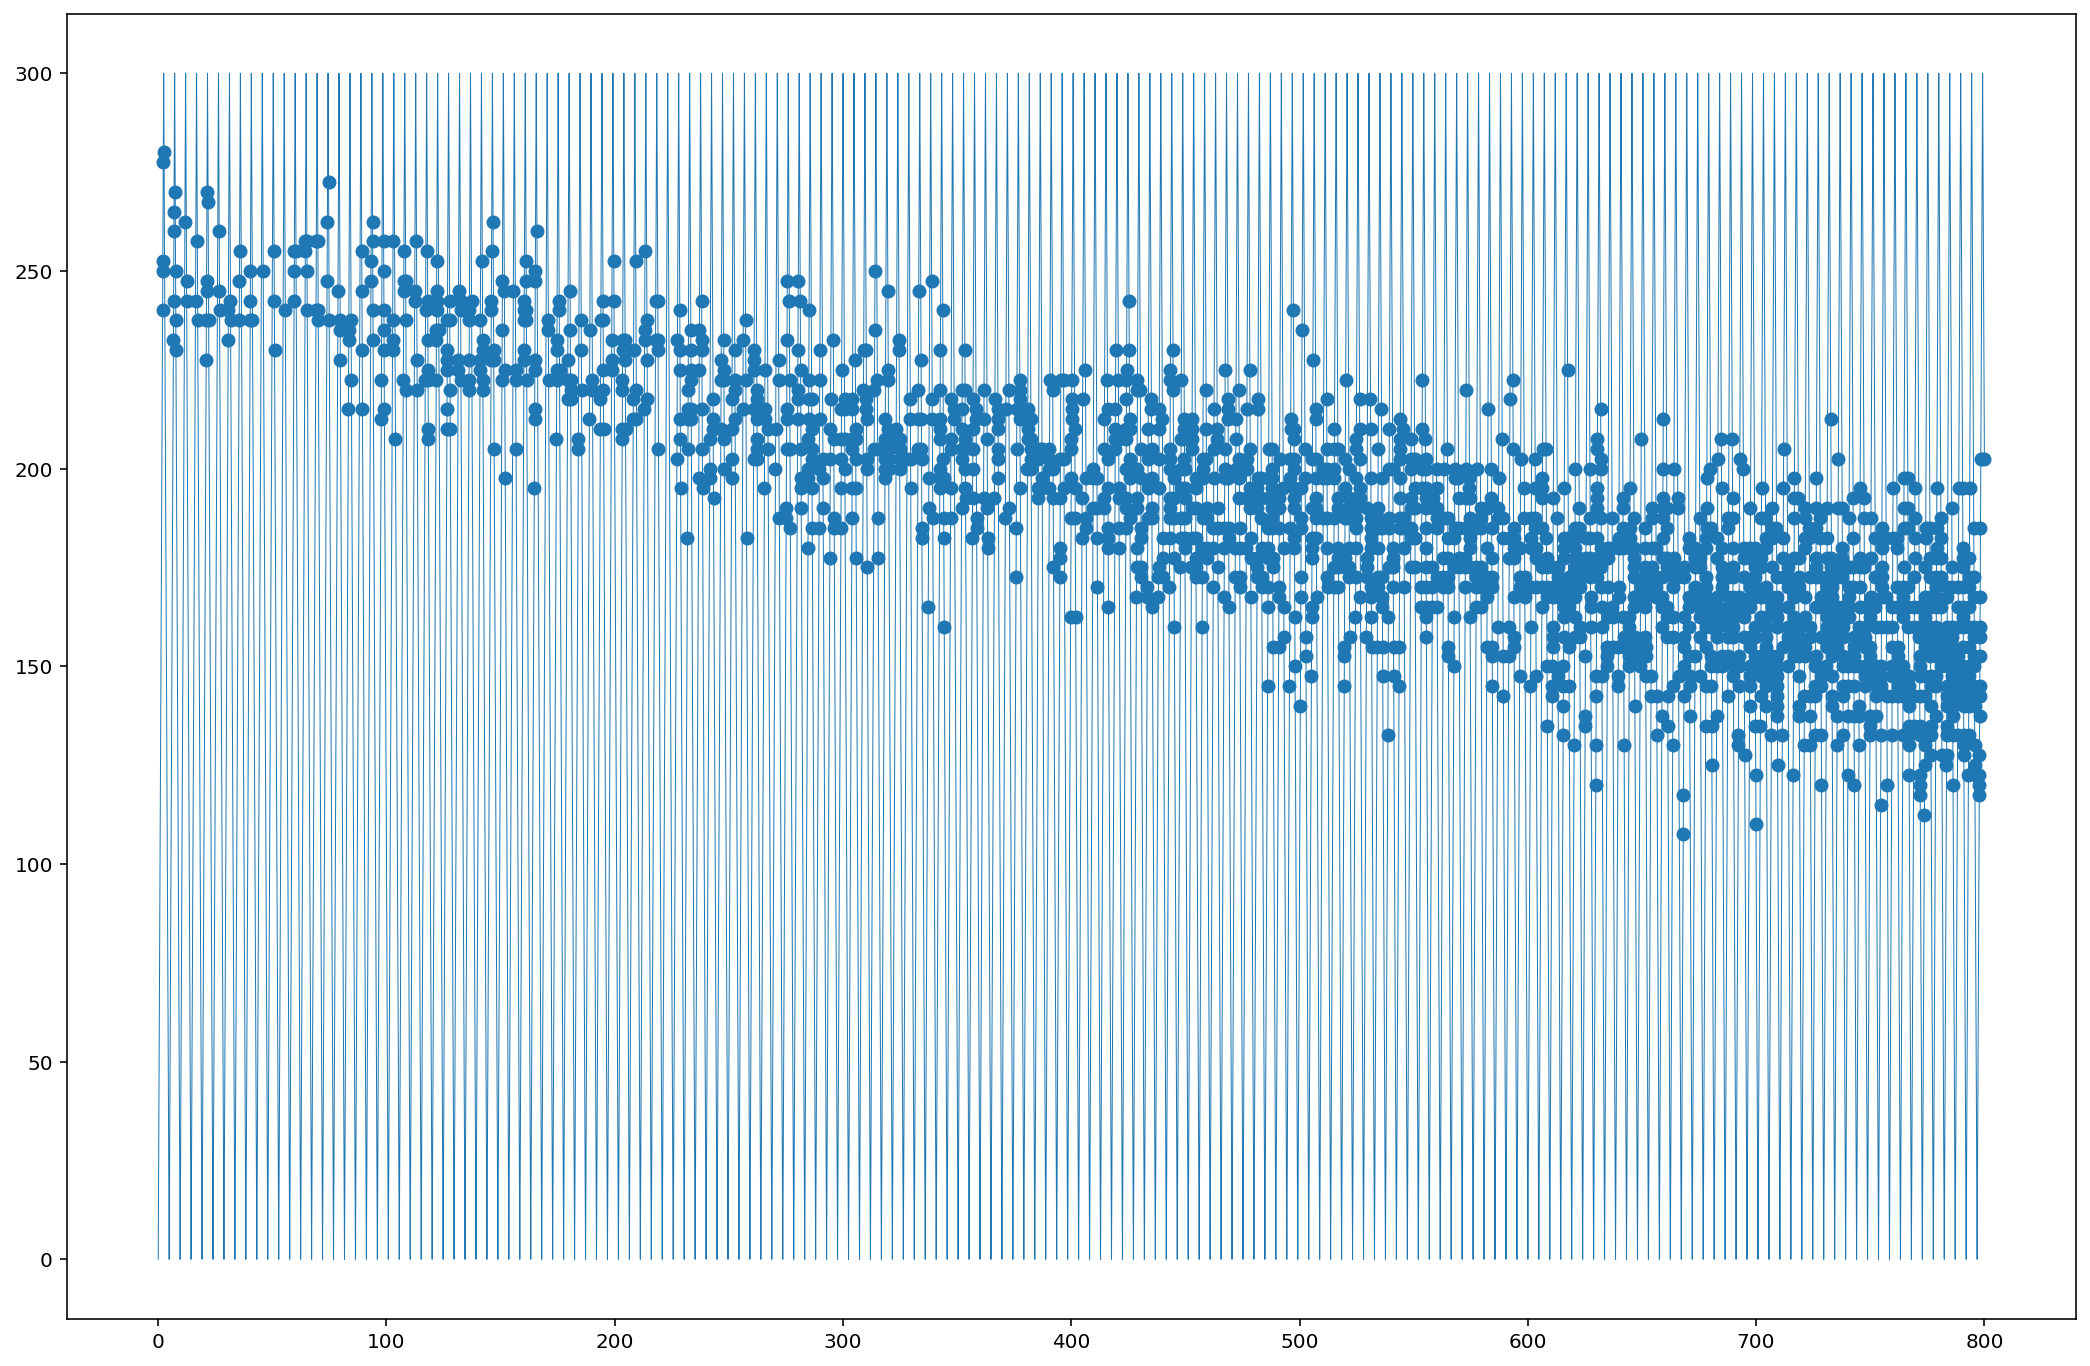

In [5]:
plt.figure(figsize=(18,12));
plt.plot(np.linspace(0,800,40000),pos,linewidth=0.5)
plt.scatter(np.argwhere(spike==1)*step,pos[np.argwhere(spike==1)]);

### Decoding

In [6]:
from adap_ppf import ppf

In [7]:
F = np.identity(3)    # System evolution matrix
Q = np.zeros((3,3))
Q[0,0] = 10**-5
Q[1,1] = 10**-3
Q[2,2] = 10**-4

In [8]:
alpha, mu, sigma, x = symbols('alpha mu sigma x', real=True, positive=True)
expr = exp(alpha - ((x-mu)**2)/(2*(sigma**2)))
param_sym = [alpha, mu, sigma]
target_sym = [x]
init_params = np.array([np.log(10), 250, 12]).reshape((1,3))
spike = spike.reshape((1,len(spike)))
pos = pos.reshape((len(pos),1))

In [9]:
expr

exp(alpha - (-mu + x)**2/(2*sigma**2))

In [10]:
params, W = ppf(numsteps,step,expr,param_sym,target_sym,init_params,F,Q,pos,spike)

In [11]:
params = params[0]

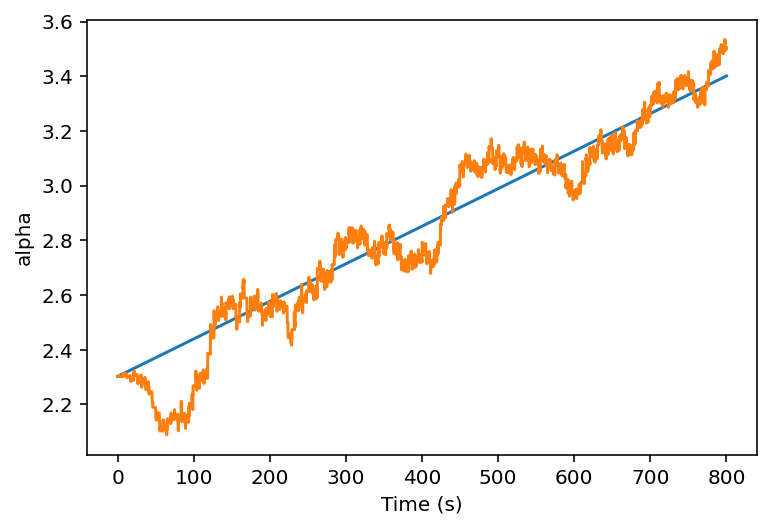

In [12]:
plt.figure();
plt.plot(np.linspace(0,800,40000),a)
plt.plot(np.linspace(0,800,40000),params[:,0]);
plt.xlabel('Time (s)'); plt.ylabel("alpha");

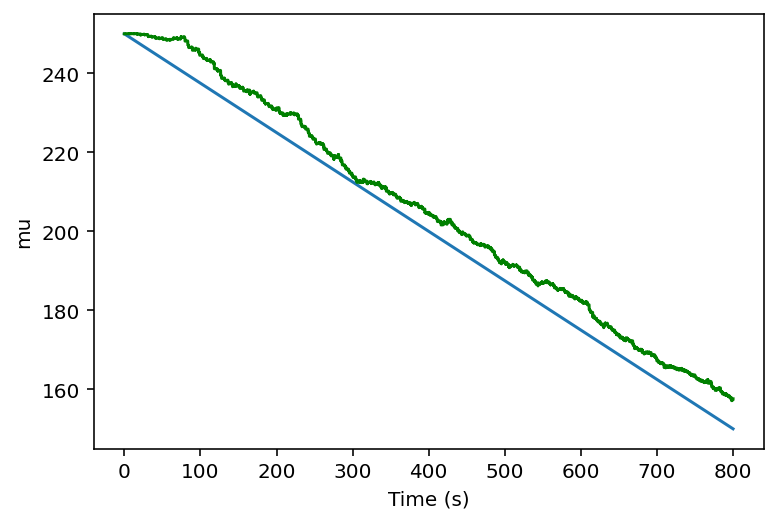

In [13]:
plt.figure();
plt.plot(np.linspace(0,800,40000),m)
plt.plot(np.linspace(0,800,40000),params[:,1], 'g');
plt.xlabel('Time (s)'); plt.ylabel("mu");

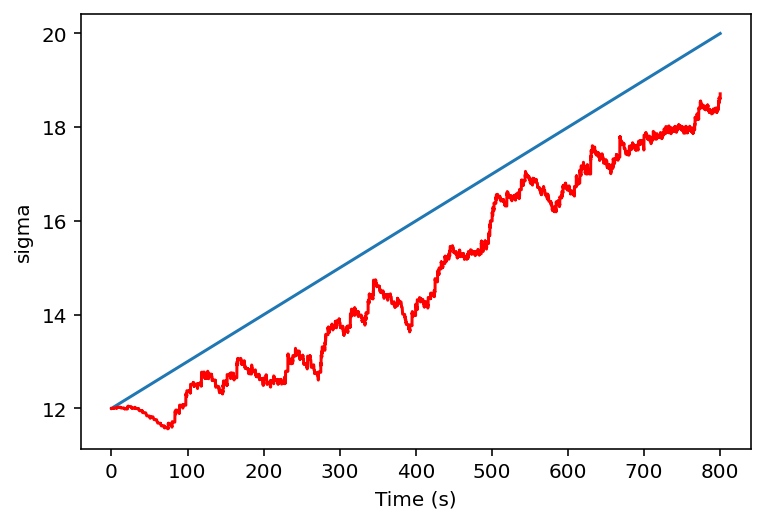

In [14]:
plt.figure();
plt.plot(np.linspace(0,800,40000),s)
plt.plot(np.linspace(0,800,40000),params[:,2], 'r');
plt.xlabel('Time (s)'); plt.ylabel("sigma");